<a href="https://colab.research.google.com/github/jugernaut/MACTI-analisisnumerico/blob/main/04_Interpolacion/02_SeriesDeTaylor_Aplicaciones/teacher/02_SeriesDeTaylor_Aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transferencia de calor con Series de Taylor
### Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019
*   Autores: 
    - Luis M. de la Cruz Salas
*   Rev: mié nov 18 17:31:23 CST 2020

In [1]:
# COLAB
!git clone https://github.com/jugernaut/Prometeo.git #rama  master
#!git clone --branch desarrollo https://github.com/jugernaut/Prometeo.git #rama desarrollo 
import Prometeo.Utils.gutils as vis

# Linux, MacOS y windows
#import os, sys
#sys.path.insert(0, os.path.abspath('../../'))
#import Utils.gutils as vis

import numpy as np

Cloning into 'Prometeo'...
remote: Enumerating objects: 4049, done.
remote: Counting objects: 100% (1470/1470), done.
remote: Compressing objects: 100% (691/691), done.
remote: Total 4049 (delta 862), reused 1263 (delta 752), pack-reused 2579
Receiving objects: 100% (4049/4049), 33.14 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (2438/2438), done.


## Modelo matemático
Un modelo matemático que describe la conducción de calor es el siguiente:

$\displaystyle
\nabla \cdot \left( \kappa \nabla T \right) = -q
$

donde $\kappa$ representa la conductividad térmica y $q$ una fuente de energía calorífica.

Si quisieramos determinar la distribución de temperaturas en una barra de metal, con $\kappa$ = cte., usaríamos un modelo en una dimensión que se puede escribir como sigue:

$
\displaystyle
\kappa \frac{d^2 T}{d x^2} = -q
$

La barra tiene una temperatura $T_A$ en su extremo izquierdo y otra temperatura $T_B$ en su extremo derecho y además consideramos que $q$ = cte.

A continuación veremos como encontrar una solución, es decir una función $T(x)$, que me de la temperatura en cada posición $x$, usando dos estrategias basadas en Series de Taylor.

## Solución analítica
Es posible obtener una función $T(x)$ que describa la distribución de temperaturas a lo largo de dicha barra. Para ello vamos a escribir $T(x)$ en forma de una serie Taylor

$
\displaystyle
T_n(x) = \sum_{i=0}^n T^{(i)}(a)\frac{(x-a)^i}{i!} = \sum_{i=0}^n c_i (x-a)^i
$

donde $\displaystyle c_i = \frac{T^{(i)}(a)}{i!}$.

Definimos ahora una aproximación alrededor de $a = 0$ para $n = 2$ con lo que obtenemos:


$\displaystyle
T(x) = c_0 + c_1 *x + c_2 * x^2
$

Calculamos la primera y segunda derivadas de $T(x)$:

$
\begin{eqnarray}
\frac{d T(x)}{d x} & = & c_1 + 2 * c_2 * x \\
\frac{d^2 T(x)}{d x^2} & = & 2 * c_2 \\
\end{eqnarray}
$

Sustituyendo esta segunda derivada en la ecuación de conducción de calor obtenemos:

$
\displaystyle
\kappa (2 * c_2 ) = -q \Longrightarrow \boxed{c_2 = -\frac{q}{2 \kappa}}
$

Para obtener $c_0$ y $c_1$ hacemos uso de las condiciones de frontera en $T(x)$:

$\displaystyle
\begin{eqnarray}
\text{Extremo izquierdo: } T(x=0) & = & c_0 + c_1 * 0 + c_2 * 0^2 = T_A  \\
&\Longrightarrow& \boxed{c_0 = T_A} \\
\text{Extremo derecho: } T(x=L) & = & c_0 + c_1 * L + c_2 * L^2 = T_A + c_1 * L - \frac{q}{2 \kappa} * L^2 =
T_B \\
&\Longrightarrow& \boxed{c_1 = \left(T_B - T_A + \frac{q L^2}{2 \kappa}\right)\frac{1}{L}}
\end{eqnarray}
$

De esta manera tenemos que la solución final es:

$\displaystyle
T(x) = T_A + \left(T_B - T_A + \frac{q L^2}{2 \kappa}\right)\frac{1}{L} x - \frac{q}{2 \kappa} x^2 =
\boxed{\left(\frac{T_B - T_A}{L} + \frac{q}{2\kappa} \left(L - x\right) \right)x + T_A}
$

Implementamos esta solución en una función de Python:

In [2]:
def temperatura(x, TA, TB, q, L, k):
    """
    Calcula la temperatura usando la fórmula obtenida con Series de Taylor.
    """
    return ((TB - TA)/L + q /(2*k) * (L - x) ) * x + TA

### Ejemplo 1

Este ejemplo representa una barra aislada con temperaturas $T_A$ y $T_B$ en sus extremos. 

Datos del problema:
- $\kappa = 1000$ [W /m $^o$C]
- $L = 0.5$ [m]
- $T_A = 100$ [$^o$C]
- $T_B = 500$ [$^o$C]
- $q = 0$

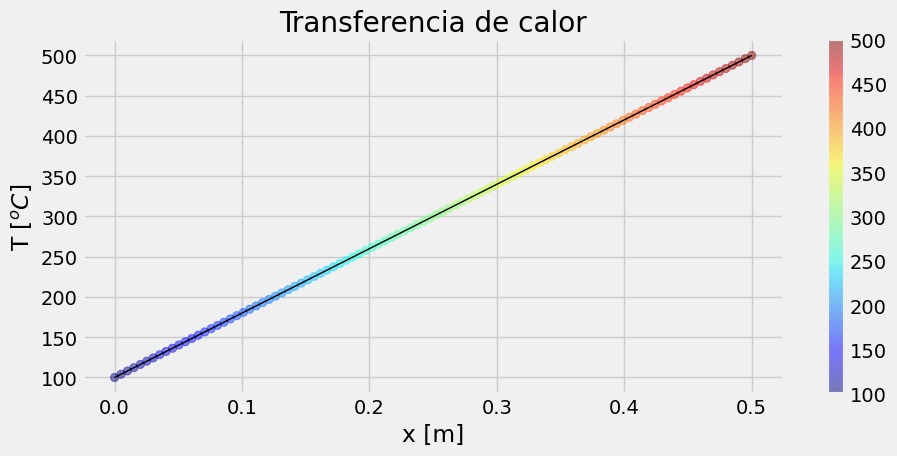

In [3]:
k = 1000
L = 0.5
TA = 100
TB = 500
q = 0

# Calculamos la temperatura con la solución analítica
x = np.linspace(0, L, 100)
T = temperatura(x, TA, TB, q, L, k)

# Definimos algunos parámetros para la gráfica
par = [{'title':'Transferencia de calor', 
        'xlabel':'x [m]',
        'ylabel':'T [$^oC$]'}]

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
graf.plot(x = x, y = T, par={'color':'k', 'lw':1.0})
s = graf.scatter(x = x, y=T, par = {'c':T, 'cmap':'jet', 'alpha':0.5})
graf.colorbar(m=s) # Se muestra una barra de color 

graf.show()

### Ejemplo 2

Este ejemplo representa una barra que en cada uno de sus puntos recibe un flujo de calor $q$ y con temperaturas $T_A$ y $T_B$ en sus extremos. Véase [2].

Datos:
- $\kappa = 0.5$ [W /m $^o$C]
- $L = 0.02$ [m]
- $T_A = 100$ [$^o$C]
- $T_B = 200$ [$^o$C]
- $q = 10^6$ [W/m$^3$]

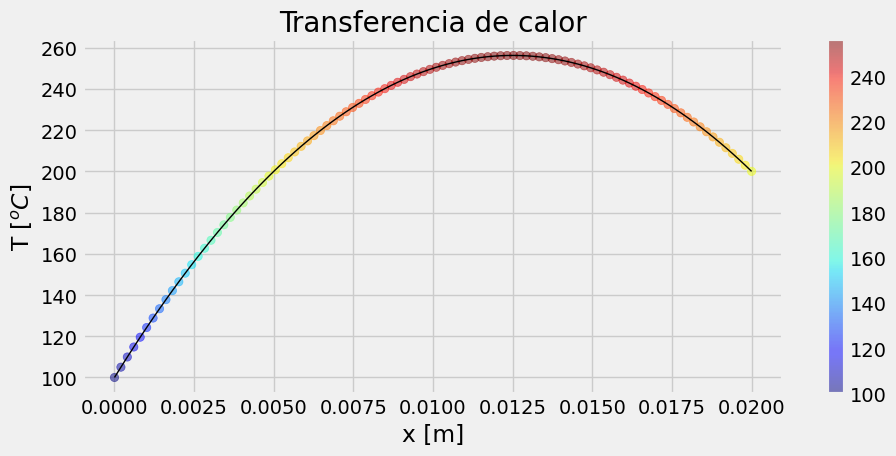

In [4]:
# Datos del problema
k = 0.5
L = 0.02
TA = 100
TB = 200
q = 1e+6

# Calculamos la temperatura con la solución analítica
x = np.linspace(0,L,100)
T = temperatura(x, TA, TB, q, L, k)

# Definimos algunos parámetros para la gráfica
par = [{'title':'Transferencia de calor', 
        'xlabel':'x [m]',
        'ylabel':'T [$^oC$]'}]

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
graf.plot(x = x, y = T, par={'color':'k', 'lw':1.0})
s = graf.scatter(x = x, y=T, par = {'c':T, 'cmap':'jet', 'alpha':0.5})
graf.colorbar(m=s) # Se muestra una barra de color 

graf.show()

## Solución numérica
Los ejemplos anteriores también se pueden resolver usando el método numérico conocido como diferencias finitas, el cual se obtiene también usando Series de Taylor. Veamos como:

### Derivadas de primer orden
Supongamos que $u(x)$ es una función bien comportada con $n$ derivadas continuas.
Entonces podemos escribir la siguiente serie de Taylor alrededor de $x_0$:

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)$ 

donde $h = x-x_0$ y de aquí se tiene que $x = x_0 + h$. Si truncamos el polinomio de Taylor a primer orden tenemos:

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + R_1(x)$ 

Luego despejamos $u^\prime(x_0)$:

$\displaystyle
\begin{eqnarray}
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{R_1(x)}{h} \\
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{u^{(2)}(\xi) h^2 / 2!}{h} \\ 
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{u^{(2)}(\xi)}{2} h\\
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \mathcal{O}(h)\\
\end{eqnarray}
$

Observaciones:
1. La última ecuación no es más que la definición de la derivada, hacia adelante:

$\displaystyle
u^\prime(x_0) = \lim_{h \rightarrow 0 } \frac{u(x_0+h) - u(x_0)}{h}
$

2. La expresión $\mathcal{O}(h)$ significa que el último término es de orden $h$.

3. Si eliminamos ese último término tendremos una aproximación de la derivada hacia adelante de orden $h$:

$\displaystyle
u^\prime(x_0) \approx \frac{u(x_0+h) - u(x_0)}{h}
$

### Ejercicio
Mostrar que la aproximación de la derivada hacia atrás de orden $h$ se escribe como:

$\displaystyle
u^\prime(x_0) \approx \frac{u(x_0) - u(x_0-h)}{h}
$

**Hint**: Escriba la expansión en series de Taylor de $u(x_0-h)$ y despeje $u^\prime(x_0)$

### Derivadas de segundo orden

Las expansiones en series de Taylor de $u(x_0 + h)$ y de $u(x_0 - h)$ son: 

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 + \frac{u^{\prime\prime\prime}(x_0)}{3!}h^3 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)
$ 

$\displaystyle
u(x_0-h) = u(x_0) - u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 - \frac{u^{\prime\prime\prime}(x_0)}{3!}h^3 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)
$ 

Ahora sumamos a las dos ecuaciones para obtener:

$\displaystyle
u(x_0+h) + u(x_0-h) = 2u(x_0) + u^{\prime\prime}(x_0) h^2 + \frac{2 u^{(4)}(x_0)}{4!}h^4 + 
\frac{2 u^{(6)}(x_0)}{6!}h^6 + \dots + \mathcal{O}(h^{(n+1)})$ 

Observamos que todos los términos de orden impar se han eliminado, esto debido a que esta aproximación es simétrica y está centrada en $x_0$. Truncamos la serie hasta orden 4 y despejamos $u^{\prime\prime}(x_0)$ :

$\displaystyle
u^{\prime\prime}(x_0) = \frac{u(x_0-h) - 2u(x_0) +  u(x_0+h)}{h^2} + \mathcal{O}(h^2)$ 

Tenemos entonces una aproximación a la segunda derivada de orden $h^2$.

## Aproximación de la ecuación de calor
Usando la aproximación de la segunda derivada obtenida anteriormente, se puede escribir la  ecuación de calor
$
\displaystyle
\kappa \frac{d^2 T}{d x^2} = q
$
como sigue:

$$
\displaystyle
\begin{eqnarray}
\kappa \left( \frac{T(x_0-h) - 2T(x_0) +  T(x_0+h)}{h^2} \right) & = & q \\
\Longrightarrow T(x_0-h) - 2T(x_0) +  T(x_0+h) & = & \frac{q h^2}{\kappa}
\end{eqnarray}
$$

Lo que nos dice esta última ecuación es que se puede aproximar la temperatura en $x_0$ con un error de orden $\mathcal{O}(h^2)$. Entonces entre más pequeño sea el $h$ mejor es la aproximación. Para obtener una solución en toda la barra, se construye una ecuación como la anterior para cada punto de la barra donde se desea conocer la temperatura, véase el siguiente video:

<video src="../../Videos/03_Conduccion1D.mp4" width="320" controls></video>

Los puntos estarán equidistantes de tal manera que la distancia entre ellos, $h$, se puede disminuir agregando cada vez más puntos. Obsérvese también que hay dos puntos especiales en  los extremos de la barra, donde la temperatura es conocida (condiciones de frontera).
Si escribimos las ecuaciones para todos los puntos, digamos que tenemos $N$ puntos, entonces obtendremos un sistema lineal de ecuaciones como el siguiente:

$
\begin{eqnarray}
T_0 - 2T_1 + T_2  & = & -Q \\
T_1 - 2T_2 + T_3 & = & -Q \\
& \vdots & \\
T_{N-2} - 2T_{N-1} + T_N & = & -Q 
\end{eqnarray}
$

donde $\displaystyle Q = \frac{q h^2}{\kappa}$, $T_0 = T_A$ (temperatura en el extremo izquierdo) y $T_N = T_B$ (temperatura en el extremo derecho). 

Se puede escribir este sistemal en forma matricial :

$
\left(
\begin{array}{ccccccccc}
-2 & 1 & 0 & \dots & & & 0\\ 
 1 &-2 & 1 & 0 & \dots & &0\\ 
 0 & 1 &-2 & 1 & 0 &  & 0\\ 
 \vdots &\ddots&\ddots&\ddots&\ddots&\ddots&\vdots\\
0 & \dots & 0 & 1 &-2 & 1 & 0 \\
0 &  \dots && 0 & 1 &-2 & 1 \\
0 &  \dots &&& 0 & 1 &-2  \\
\end{array}\right)
\left(
\begin{array}{c}
T_1 \\ T_2 \\ T_3 \\ \vdots \\ T_{N-3} \\ T_{N-2} \\ T_{N-1}
\end{array}\right) = 
-\left(
\begin{array}{c}
Q + T_A \\ Q \\ Q \\ \vdots \\ Q \\ Q \\ Q + T_{B}
\end{array}\right)
$

Resolviendo el sistema obtendremos las temperaturas en todos los puntos y por lo tanto una aproximación a la solución. La siguiente función de Python genera el sistema lineal, lo resuelve y regresa la temperatura en los diferentes puntos de la barra:

In [5]:
def resuelveDF(TA, TB, q, L, k, N):
    h = L / (N-1)

    # Construcción del vector del lado derecho (RHS)
    Q = np.zeros(N)
    
    # Construcción de la matriz
    A = np.identity(N)
    for i in range(1,N-1):
        A[i,i-1] = 1
        A[i,i]   = -2
        A[i,i+1] = 1
        Q[i] = -q * h**2 / k
    
    # Aplicación de las condiciones de frontera
    Q[1]  -= TA
    Q[-2] -= TB
    
    # Solución del sistema y regreso de la solución
    return np.linalg.solve(A[1:-1,1:-1], Q[1:-1])

### Aplicación al Ejemplo 1

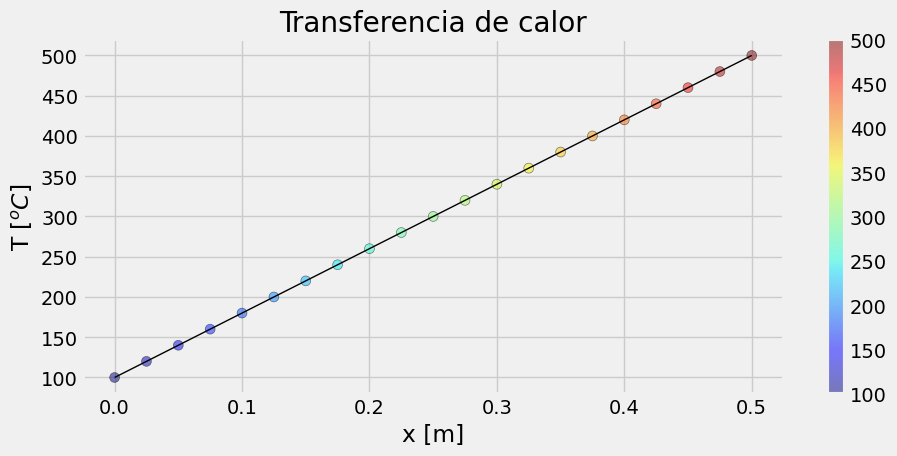

In [6]:
# Datos del problema
k = 1000
L = 0.5
TA = 100
TB = 500
q = 0
N = 21 # Número de puntos de la aproximación

# Arreglo para almacenar la solución numérica
T = np.zeros(N)

# Condiciones de frontera
T[0] = TA
T[-1] = TB

# Calculamos la temperatura con el método numérico
x = np.linspace(0, L, N)
T[1:-1] = resuelveDF(TA, TB, q, L, k, N)

# Definimos algunos parámetros para la gráfica
par = [{'title':'Transferencia de calor', 
        'xlabel':'x [m]',
        'ylabel':'T [$^oC$]'}]

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
graf.plot(x = x, y = T, par={'color':'k', 'lw':1.0})
s = graf.scatter(x = x, y=T, par = {'c':T, 'ec':'black', 's':50, 'cmap':'jet', 'alpha':0.5})
graf.colorbar(m=s) # Se muestra una barra de color 

graf.show()

### Aplicación al Ejemplo 2

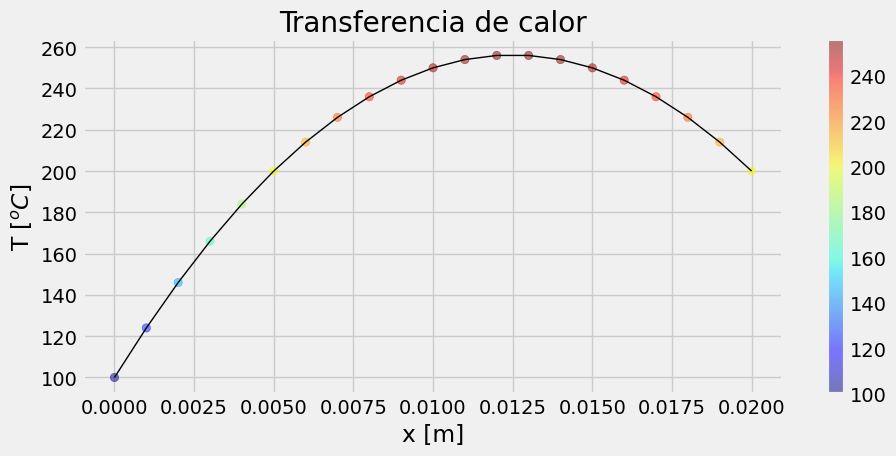

In [7]:
# Datos del problema
k = 0.5
L = 0.02
TA = 100
TB = 200
q = 1e+6
N = 21 # Número de puntos de la aproximación

# Arreglo para almacenar la solución numérica
T = np.zeros(N)

# Condiciones de frontera
T[0] = TA
T[-1] = TB

# Calculamos la temperatura con el método numérico
x = np.linspace(0, L, N)
T[1:-1] = resuelveDF(TA, TB, q, L, k, N)

# Definimos algunos parámetros para la gráfica
par = [{'title':'Transferencia de calor', 
        'xlabel':'x [m]',
        'ylabel':'T [$^oC$]'}]

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
graf.plot(x = x, y = T, par={'color':'k', 'lw':1.0})
s = graf.scatter(x = x, y=T, par = {'c':T, 'cmap':'jet', 'alpha':0.5})
graf.colorbar(m=s) # Se muestra una barra de color 

graf.show()

Observamos que en los dos ejemplos, las soluciones son similares a las obtenidas usando la solución analítica. Intente aumentar el número de puntos ($N$) de la aproximación y vea lo que sucede. Para evaluar la precisión del método, se propone al estudiante que calcule la norma del error entre solución analítica y la solución numérica.